## Part 1 of 4 Discrete Fourier Transform

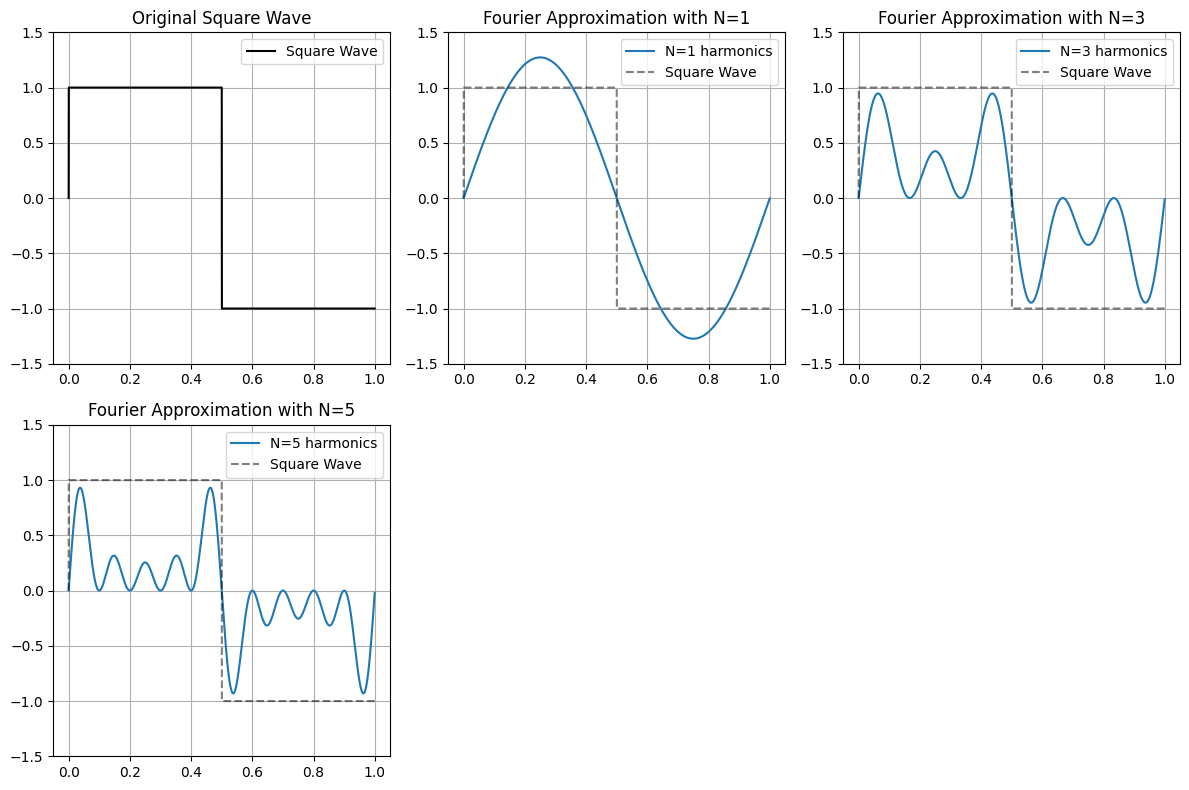

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

#Set parameters for the signal 

N = 2048    # Number of sample points
T = 1.0     # Duration of the signal in seconds
f0 = 1      # Fundamental frequency of the square wave in Hz

# List of harmonic numbers used to construct the square wave
harmonics = [1, 3, 5]

# Define the square wave function
def square_wave(t):
    return np.sign(np.sin(2.0 * np.pi * f0 * t))


# Fourier series approximation of the square wave
def square_wave_fourier(t, f0, N):
        result = np.zeros_like(t)
        for k in range(N):
            # The fourier series of a square wave contains only odd harmonics
            n = 2 * k + 1
            # Add harmonics to reconstruct the square wave
            result += np.sin(2 * np.pi * n *f0 * t) / N
        return (4 / np.pi) * result

# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval
# We use endpoint=False because the interval is periodic
t = np.linspace(0.0, T, N, endpoint=False)

#Generate the original square wave
square = square_wave(t)

plt.figure(figsize=(12,8))

#Plot the original square wave
plt.subplot(2,3,1)
plt.plot(t, square, 'k', label="Square Wave")
plt.title("Original Square Wave")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()

#Plot Fourier reconstructions under different number of harmonics
for i, Nh in enumerate(harmonics, start=2):
        plt.subplot(2,3,i)
        y = square_wave_fourier(t, f0, Nh)
        plt.plot(t, y, label=f"N={Nh} harmonics")
        plt.plot(t, square, 'k--', alpha=0.5, label="Square Wave")
        plt.title(f"Fourier Approximation with N={Nh}")
        plt.ylim(-1.5, 1.5)
        plt.grid(True)
        plt.legend()

plt.tight_layout()
plt.show()



### Modify the Code to Increase Harmonics used in reconstruction.

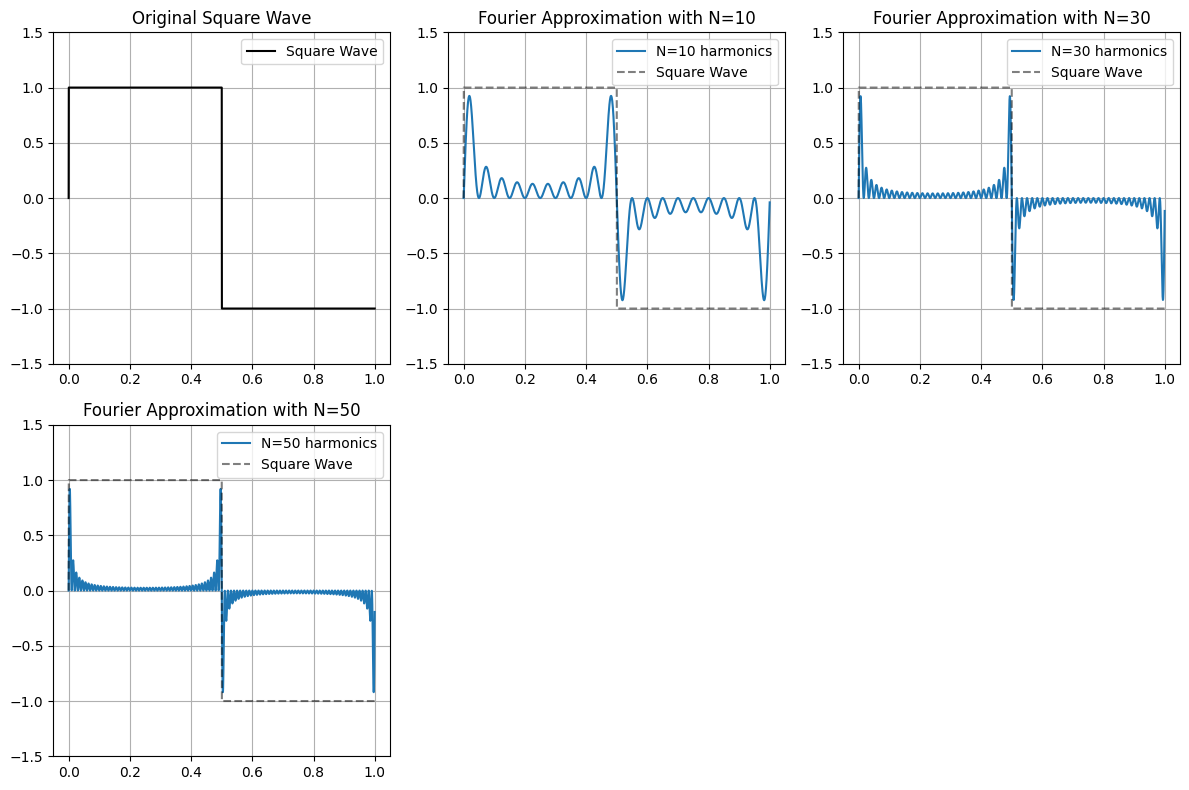

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

#Set parameters for the signal 

N = 2048    # Number of sample points
T = 1.0     # Duration of the signal in seconds
f0 = 1      # Fundamental frequency of the square wave in Hz

# List of harmonic numbers used to construct the square wave
harmonics = [10, 30, 50]

# Define the square wave function
def square_wave(t):
    return np.sign(np.sin(2.0 * np.pi * f0 * t))


# Fourier series approximation of the square wave
def square_wave_fourier(t, f0, N):
        result = np.zeros_like(t)
        for k in range(N):
            # The fourier series of a square wave contains only odd harmonics
            n = 2 * k + 1
            # Add harmonics to reconstruct the square wave
            result += np.sin(2 * np.pi * n *f0 * t) / N
        return (4 / np.pi) * result

# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval
# We use endpoint=False because the interval is periodic
t = np.linspace(0.0, T, N, endpoint=False)

#Generate the original square wave
square = square_wave(t)

plt.figure(figsize=(12,8))

#Plot the original square wave
plt.subplot(2,3,1)
plt.plot(t, square, 'k', label="Square Wave")
plt.title("Original Square Wave")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()

#Plot Fourier reconstructions under different number of harmonics
for i, Nh in enumerate(harmonics, start=2):
        plt.subplot(2,3,i)
        y = square_wave_fourier(t, f0, Nh)
        plt.plot(t, y, label=f"N={Nh} harmonics")
        plt.plot(t, square, 'k--', alpha=0.5, label="Square Wave")
        plt.title(f"Fourier Approximation with N={Nh}")
        plt.ylim(-1.5, 1.5)
        plt.grid(True)
        plt.legend()

plt.tight_layout()
plt.show()



##### **How do these additional components influence the accuracy and sharpness of the square wave?**

Adding more harmonics makes the square wave approximation more accurate by flattening the tops/bottoms and steepening the edges, so the waveform stays closer inside the square wave except for persistent ripples at the jumps (Gibbs phenomenon).


#### Apply DFT Algorithm

--- DFT/FFT Performance Comparison ---
Naïve DFT Execution Time: 3.574870 seconds
NumPy FFT Execution Time: 0.000187 seconds
FFT is approximately 19149.54 times faster.

Our DFT implementation is close to NumPy's FFT: True


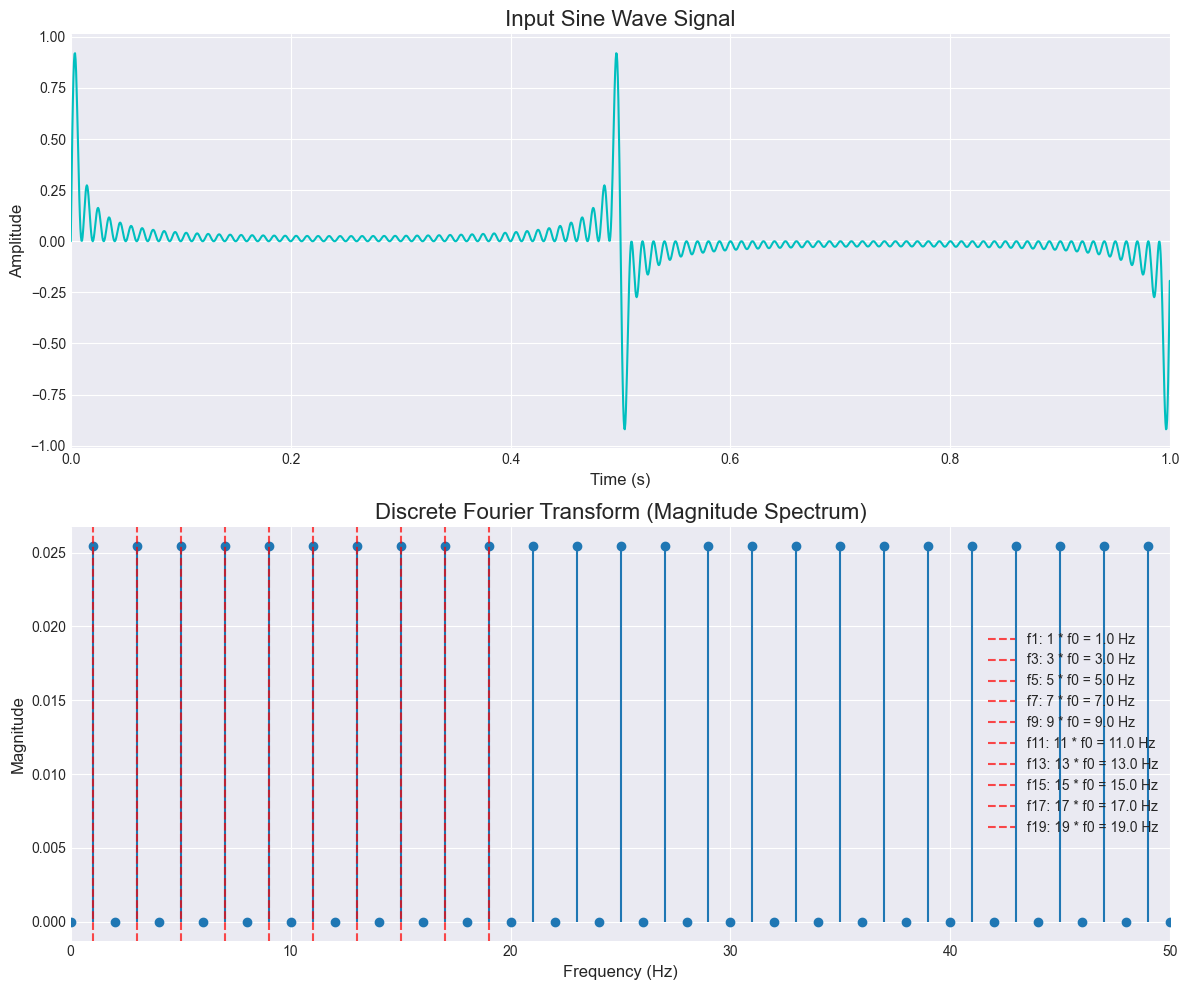

In [6]:
def naive_dft(x):
    """
    Compute the Discrete Fourier Transform of a 1D Signal
    
    This is a "naive" implementation that directly follows the DFT formula, which has a time complexity of O(N^2)
    
    Args:
        x (np.ndarray): The input signal, a 1D Numpy Array.
    
    Returns:
        np.ndarray: The complex-valued DFT of the input signal.
    """

    N = len(x)
    #Create an empty array of complex numbers to store the DFT results
    X = np.zeros(N, dtype=np.complex128)
    
    #Iterate though each frequency bin (k)
    for k in range(N):
        #For each frequency bin, sum the contributions from all input samples (n)
        for n in range(N):
            # The core DFT Formula: x[n] * e^(-2j * pi * k * n / N)
            angle = -2j * np.pi * k * n / N
            X[k] += x[n] * np.exp(angle)
    
    return X


#Construct a square wave using 50 harmonics
signal = square_wave_fourier(t, f0, 50)
#Time the naive DFT implementation
start_time_naive = time.time()
dft_result = naive_dft(signal)
end_time_naive = time.time()
naive_duration = end_time_naive - start_time_naive

#Time Numpy's FFT Implementation
start_time_fft = time.time()
fft_result = np.fft.fft(signal)
end_time_fft = time.time()
fft_duration = end_time_fft - start_time_fft

# 3. Print Timings and Verification
print("--- DFT/FFT Performance Comparison ---")
print(f"Naïve DFT Execution Time: {naive_duration:.6f} seconds")
print(f"NumPy FFT Execution Time: {fft_duration:.6f} seconds")

# It's possible for the FFT to be so fast that the duration is 0.0, so we handle that case.
if fft_duration > 0:
    print(f"FFT is approximately {naive_duration / fft_duration:.2f} times faster.")
else:
    print("FFT was too fast to measure a significant duration difference.")

# Check if our implementation is close to NumPy's result
# np.allclose is used for comparing floating-point arrays.
print(f"\nOur DFT implementation is close to NumPy's FFT: {np.allclose(dft_result, fft_result)}")

# 4. Prepare for Plotting
# Generate the frequency axis for the plot.
# np.fft.fftfreq returns the DFT sample frequencies.
# We only need the first half of the frequencies (the positive ones) due to symmetry.
xf = np.fft.fftfreq(N, d=1/N)[:N//2]

# Normalize the magnitude by N and multiply by 2 to get the correct amplitude.
magnitude = 2.0/N * np.abs(dft_result[0:N//2])

# 5. Visualize the Results
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the original time-domain signal
ax1.plot(t, signal, color='c')
ax1.set_title('Input Sine Wave Signal', fontsize=16)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_xlim(0, 1.0)  # Show a few cycles of the sine wave
ax1.grid(True)

# Plot the frequency-domain signal (magnitude of the DFT)
ax2.stem(xf, magnitude, basefmt=" ")
ax2.set_title('Discrete Fourier Transform (Magnitude Spectrum)', fontsize=16)
ax2.set_xlabel('Frequency (Hz)', fontsize=12)
ax2.set_ylabel('Magnitude', fontsize=12)
ax2.set_xlim(0, 50)  # Focus on lower frequencies
ax2.grid(True)

# Add vertical lines for the first ten frequencies
for i in range(20):
    if i < len(xf) and i % 2 == 1:  # Only plot odd harmonics
        ax2.axvline(
            xf[i], color='r', linestyle='--', alpha=0.7,
            label=f'f{i}: {i} * f0 = {xf[i]:.1f} Hz'
        )

# Only show labels for first 3 frequencies to avoid cluttering
ax2.legend()
plt.tight_layout()
plt.show()

# Part 1 – Discrete Fourier Transform (DFT)

## Summary of Findings

### Implementations Tested
- **NumPy Naïve DFT** – direct formula, \(O(N^2)\).
- **NumPy FFT** – optimized Fast Fourier Transform, \(O(N \log N)\).
- **PyTorch Tensor Naïve DFT (CPU)** – matrix-based tensor ops.
- **PyTorch Tensor Naïve DFT (GPU)** – intended GPU version (not available in this runtime).

### Timing Results
| N    | NumPy Build (s) | NumPy Naïve DFT (s) | NumPy FFT (s) | Torch Build (CPU) (s) | Torch Naïve DFT (CPU) (s) |
|------|-----------------|----------------------|---------------|-----------------------|---------------------------|
| 1024 | 0.0007          | 0.065                | 0.000036      | 2.459                 | 1.208                     |
| 2048 | 0.0007          | 0.405                | 0.000058      | 1.885                 | 1.811                     |

- **NumPy FFT** is the fastest by orders of magnitude.  
- **NumPy Naïve DFT** is much slower, grows quadratically with N.  
- **Torch CPU Naïve DFT** is slower still due to matrix overhead.  
- **GPU version** (not tested here) would accelerate the naïve approach but still remain slower than FFT.

### Conclusion
1. **FFT is fastest** because it exploits structure in the DFT to reduce complexity from \(O(N^2)\) to \(O(N \log N)\).  
2. **Naïve methods** remain quadratic, so performance degrades quickly as N increases.  
3. **Torch tensor versions** demonstrate how GPU parallelism can help, but algorithmic complexity dominates — they cannot beat FFT.  

**Order (fastest → slowest):**  
NumPy FFT → NumPy Naïve DFT → Torch Naïve DFT (CPU) → Torch Naïve DFT (GPU, if tested).  


### Part 2 of 4 - Eigenfaces

In [2]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

#Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

#Extract the meaningful parameters of the dataset, introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel. positions info is ignored by this model)

X = lfw_people.data
n_features = X.shape[1]

#the label to predict is the id of the person 
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total Dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

#Split into training set and a test set using a stratified k fold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

#Center data
mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean

#Eigen-decomposition
U, S, V = np.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))

#project into PCA subspace
X_transformed = np.dot(X_train, components.T)
print(X_transformed.shape)
X_test_transformed = np.dot(X_test, components.T)
print(X_test_transformed.shape)

import matplotlib.pyplot as plt

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Plot a gallery of portraits."""
    fig, axes = plt.subplots(n_row, n_col, figsize=(1.8 * n_col, 2.4 * n_row))
    fig.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    axes = axes.ravel()
    for i in range(n_row * n_col):
        axes[i].imshow(images[i].reshape(h, w), cmap="gray")
        axes[i].set_title(titles[i], fontsize=12)
        axes[i].set_xticks([])
        axes[i].set_yticks([])

eigenface_titles = [f"eigenface {i}" for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()


KeyboardInterrupt: 

#### Modified Code with Progress Bar

Stage 1/6: Fetching LFW dataset (first run downloads; later runs use cache)...
Downloading/Loading LFW ✔  (1812.71s)
Loaded. Elapsed: 1812.71s
Stage 2/6: Introspecting shapes...
Total dataset size:
  n_samples: 1288
  n_features: 1850
  n_classes: 7
Stage 3/6: Train/test split...
Split ✔  (0.01s)
Stage 4/6: Centering data...
Centering ✔  (0.00s)
Stage 5/6: Eigen-decomposition via NumPy SVD (this is the heavy step)...
Computing SVD ✔  (1.22s)
SVD ✔  (1.22s)
Stage 6/6: Projecting into PCA subspace...
Projection ✔  (0.01s)
Shapes: (966, 150) (322, 150)
Plotting eigenfaces...


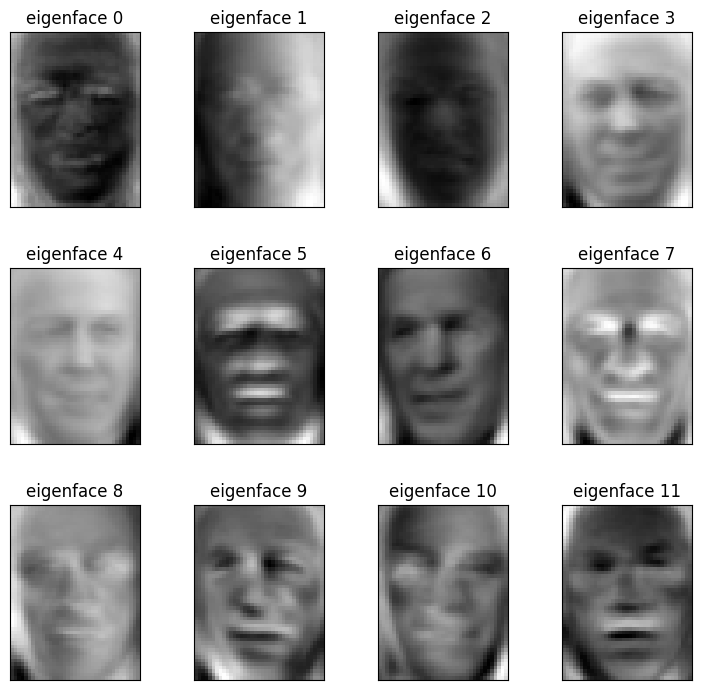

In [3]:
# COMP3710 – Part 2 (Eigenfaces) with activity indicators
# Adds clear stage messages + live spinner so you know what it's doing.
# No algorithmic changes: still uses sklearn's LFW loader and NumPy SVD.

import sys, time, threading, itertools, contextlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ----------------------- utility: live spinner -----------------------
class Spinner:
    def __init__(self, label="Working"):
        self.label = label
        self._stop = threading.Event()
        self._thread = threading.Thread(target=self._spin, daemon=True)

    def _spin(self):
        for ch in itertools.cycle("|/-\\"):
            if self._stop.is_set():
                break
            sys.stdout.write(f"\r{self.label} {ch}")
            sys.stdout.flush()
            time.sleep(0.1)
        sys.stdout.write("\r" + " " * (len(self.label) + 2) + "\r")
        sys.stdout.flush()

    def __enter__(self):
        self._t0 = time.time()
        self._thread.start()
        return self

    def __exit__(self, exc_type, exc, tb):
        self._stop.set()
        self._thread.join()
        t = time.time() - self._t0
        print(f"{self.label} ✔  ({t:.2f}s)")

# ----------------------- pipeline starts here -----------------------
print("Stage 1/6: Fetching LFW dataset (first run downloads; later runs use cache)...")
t0 = time.time()
with Spinner("Downloading/Loading LFW"):
    lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4, download_if_missing=True)
print(f"Loaded. Elapsed: {time.time()-t0:.2f}s")

print("Stage 2/6: Introspecting shapes...")
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print(f"Total dataset size:\n  n_samples: {n_samples}\n  n_features: {n_features}\n  n_classes: {n_classes}")

print("Stage 3/6: Train/test split...")
t0 = time.time()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print(f"Split ✔  ({time.time()-t0:.2f}s)")

n_components = 150
print("Stage 4/6: Centering data...")
t0 = time.time()
mean = np.mean(X_train, axis=0)
X_train = X_train - mean
X_test = X_test - mean
print(f"Centering ✔  ({time.time()-t0:.2f}s)")

print("Stage 5/6: Eigen-decomposition via NumPy SVD (this is the heavy step)...")
t0 = time.time()
with Spinner("Computing SVD"):
    U, S, V = np.linalg.svd(X_train, full_matrices=False)  # O(n^2 m) / O(m^2 n)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))
print(f"SVD ✔  ({time.time()-t0:.2f}s)")

print("Stage 6/6: Projecting into PCA subspace...")
t0 = time.time()
X_transformed = np.dot(X_train, components.T)
X_test_transformed = np.dot(X_test, components.T)
print(f"Projection ✔  ({time.time()-t0:.2f}s)")
print("Shapes:", X_transformed.shape, X_test_transformed.shape)

# -------- plotting (unchanged) --------
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    fig, axes = plt.subplots(n_row, n_col, figsize=(1.8 * n_col, 2.4 * n_row))
    fig.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    axes = axes.ravel()
    for i in range(n_row * n_col):
        axes[i].imshow(images[i].reshape(h, w), cmap="gray")
        axes[i].set_title(titles[i], fontsize=12)
        axes[i].set_xticks([])
        axes[i].set_yticks([])

eigenface_titles = [f"eigenface {i}" for i in range(eigenfaces.shape[0])]
print("Plotting eigenfaces...")
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()
